In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#_l1 = np.random.normal(loc = 52.0, scale = 3.0, size = 10000)


In [3]:
#sum(_l1 < 50)

In [4]:
import polling_data as p_d
import ec_votes as e_v

print(p_d.States['Alabama'][-1])
print(e_v.Electoral_College['Alabama'][1])

['Capital Survey: 6/7 - 27', 36, 51, 4.2]
9


In [5]:
list_of_states = sorted(list(p_d.States.keys()))
len_states = len(list_of_states)

In [6]:
#------  First ammended version, which used average for all the data. ------
first_states_average = []
for y in list_of_states:
    count = new_dem = new_rep = new_error = 0
    for i in p_d.States[y]:
        new_dem +=  i[1]
        new_rep += i[2]
        new_error += i[3]
        count += 1
    first_states_average.append([y, new_dem/count, new_rep/count, new_error/count])


In [7]:
# Second ammended version, which uses importance factor, according to the time of release, with the latest being most important
states_average = []
for y in list_of_states: # Improved Code, that takes importance into account
    total = count = new_dem = new_rep = new_error = 0
    for i in reversed(p_d.States[y]):
        imp_value = 0.5**count # Importance factor
        
        new_dem +=  (i[1] * imp_value)
        new_rep += (i[2] * imp_value)
        new_error += (i[3] * imp_value)
        total += imp_value
        
        count += 1
    #print(y, new_dem/1, new_rep/1, new_error/1, total)    
    states_average.append([y, new_dem/total, new_rep/total, new_error/total])    

In [8]:
def list_creator(decidor):
    _dem = [decidor[i][1] for i in range(len_states)]
    _rep = [decidor[i][2] for i in range(len_states)]
    _error = [decidor[i][3] for i in range(len_states)]
    
    return _dem, _rep, _error

In [9]:

def who_wins(n):
    dem_wins = rep_wins = 0
    for i in range(len(list_of_states)):
        _check_total = _dem[i] + _rep[i]
        
        if _check_total < 100.0:
            _dem[i] += (100.0 - _check_total)/2
            _rep[i] += (100.0 - _check_total)/2
        
        all_votes = np.random.normal(loc = _dem[i], scale = _error[i]/2, size = n)
        dem_votes = sum(all_votes > 50.0)

        if dem_votes > n//2:
            #print("democratic party wins this.")
            dem_wins += e_v.Electoral_College[list_of_states[i]][1]
        else:
            rep_wins += e_v.Electoral_College[list_of_states[i]][1]
            #print("Republicans win. Makes me sad.")
    return dem_wins, rep_wins, dem_wins + rep_wins

In [10]:
def plot_it(y,n,new_list = states_average):
    list_dem = []
    list_rep = []
    list_time = [i for i in range(y)]

    _dem, _rep, _error = list_creator(new_list)
    for i in range(y):
        dem, rep, total = who_wins(n)
        list_dem.append(dem)
        list_rep.append(rep)

    plt.plot(list_time, list_dem, label='Democratic wins')
    plt.plot(list_time, list_rep, label='Republican wins')
    plt.axhline(y = 270, xmax = list_time[-1], label='Winning line', color = 'r')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Number of elections")
    plt.ylabel("Electoral College Votes")

In [11]:
%%time
print("Graph for the list states_average")
plot_it(500, 20,states_average)


Graph for the list states_average


NameError: name '_dem' is not defined

Graph for the list first_states_average
CPU times: user 2.04 s, sys: 16.4 ms, total: 2.06 s
Wall time: 2.01 s


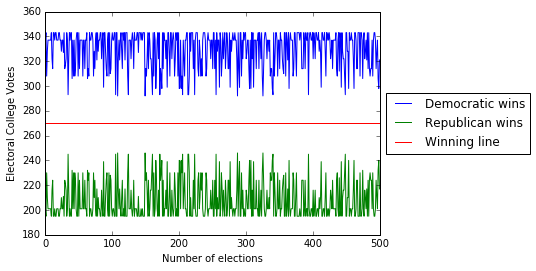

In [102]:
%%time
print("Graph for the list first_states_average")
plot_it(500, 20,states_average)


538


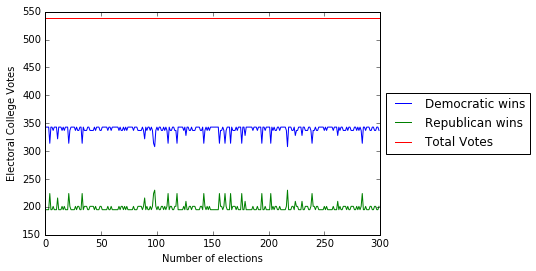

In [104]:
from ipywidgets import interact

def plot_new(y,n):
    list_dem = []
    list_rep = []
    list_time = [i for i in range(y)]

    _dem, _rep, _error = list_creator(states_average)
    for i in range(y):
        dem, rep, total = who_wins(n)
        list_dem.append(dem)
        list_rep.append(rep)
    
    list_total = [list_dem[i] + list_rep[i] for i in range(len(list_dem))]
    
    plt.plot(list_time, list_dem, label='Democratic wins')
    plt.plot(list_time, list_rep, label='Republican wins')
    plt.plot(list_time, list_total, label='Total Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Number of elections")
    plt.ylabel("Electoral College Votes")
    
    print(list_total[-1])
    
    
interact(plot_new, y = 100, n=20)